In [2]:
from compoundeye.evaluation import evaluate

import numpy as np
import matplotlib.pyplot as plt

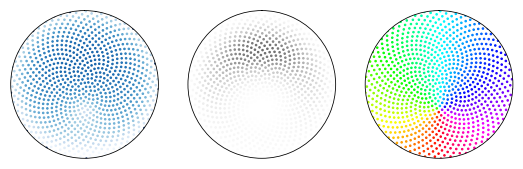

In [2]:
%matplotlib inline
from compoundeye.geometry import fibonacci_sphere
from environment import Sky
from notebooks.plots import plot_sky

samples = 1000

theta, phi = fibonacci_sphere(samples, 180)
sky = Sky(np.pi/6, np.pi)
y, p, a = sky(theta, phi)

plt.figure("sky", figsize=(9, 3))
plot_sky(phi, theta, y, p, a).show()

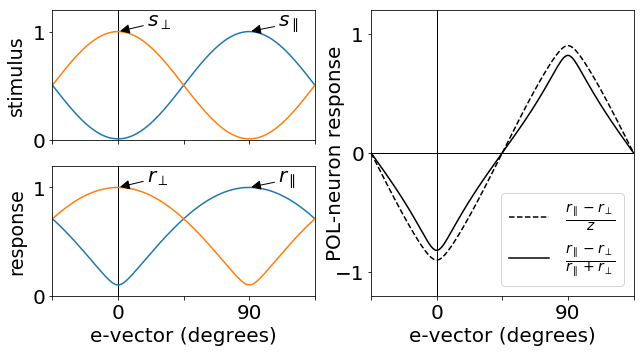

In [3]:
from notebooks.plots import plot_pol_neurons_rotating_linear_polariser

Y = 7.5  # light intensity
pol = .9  # degree of polarasation
e = np.linspace(-np.pi / 4, 3 * np.pi / 4, 361)  # e-vector orientation
act_func = np.sqrt  # activation function

s_1 = Y * (np.square(np.cos(e)) + np.square(np.sin(e)) * np.square(1. - pol))
s_2 = Y * (np.square(np.sin(e)) + np.square(np.cos(e)) * np.square(1. - pol))

r_1 = act_func(s_1)
r_2 = act_func(s_2)

z = act_func(Y)
r_z = (r_2 - r_1) / z
r_pol = (r_2 - r_1) / (r_2 + r_1)

plt.figure("photoreceptors", figsize=(9, 5))
plot_pol_neurons_rotating_linear_polariser(
    [np.rad2deg(e), s_1 / Y], [np.rad2deg(e), s_2 / Y],
    [np.rad2deg(e), r_1 / z], [np.rad2deg(e), r_2 / z],
    [np.rad2deg(e), r_z], [np.rad2deg(e), r_pol]).show()

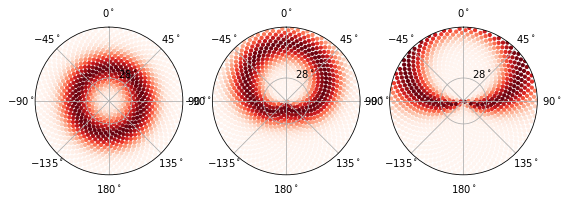

In [4]:
from notebooks.plots import plot_gate_ring

plt.figure("gate-ring", figsize=(9, 3))
plot_gate_ring(theta_t=np.deg2rad(0), subplot=131)
plot_gate_ring(theta_t=np.deg2rad(30), subplot=132)
plot_gate_ring(theta_t=np.deg2rad(60), subplot=133).show()

notebooks/plots.py:137: RuntimeWarning: invalid value encountered in arcsin
  ele_pred = 26 * (1 - 2 * np.arcsin(1 - res) / np.pi) + 15  # + np.random.randn(res.size)


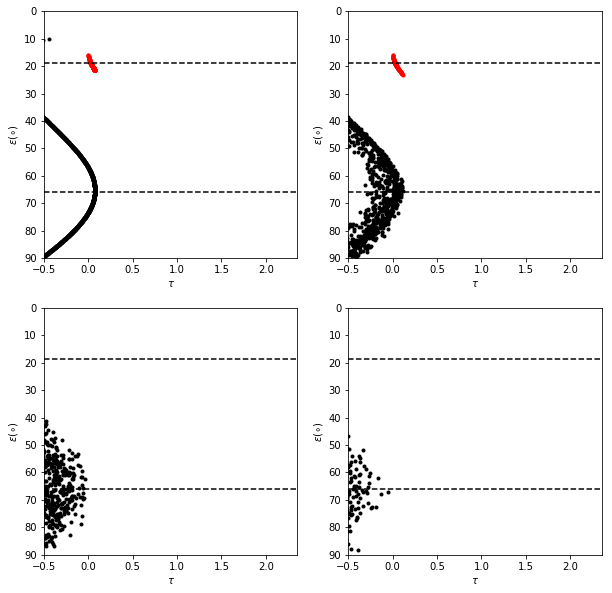

In [5]:
from notebooks.plots import plot_res2ele

plt.figure("res2ele", figsize=(10, 10))
plot_res2ele(noise=0.00, subplot=221)
plot_res2ele(noise=0.06, subplot=222)
plot_res2ele(noise=0.26, subplot=223)
plot_res2ele(noise=0.43, subplot=224).show()

Error: 3.2521 +/- 0.1002 | N = 869


<Figure size 720x720 with 0 Axes>

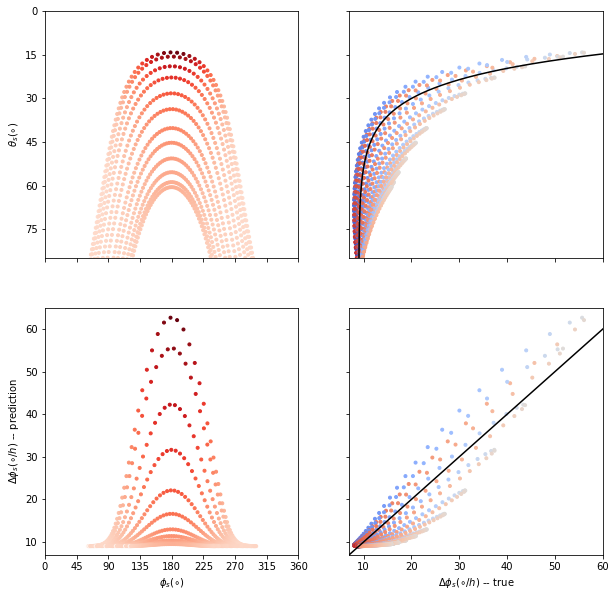

In [9]:
from environment import get_seville_observer
from notebooks.plots import plot_ephemeris

from datetime import datetime

obs = get_seville_observer()
obs.date = datetime.strptime("2018-06-21", "%Y-%m-%d")

plt.figure("ephemeris", figsize=(10, 10))
plot_ephemeris(obs).show()

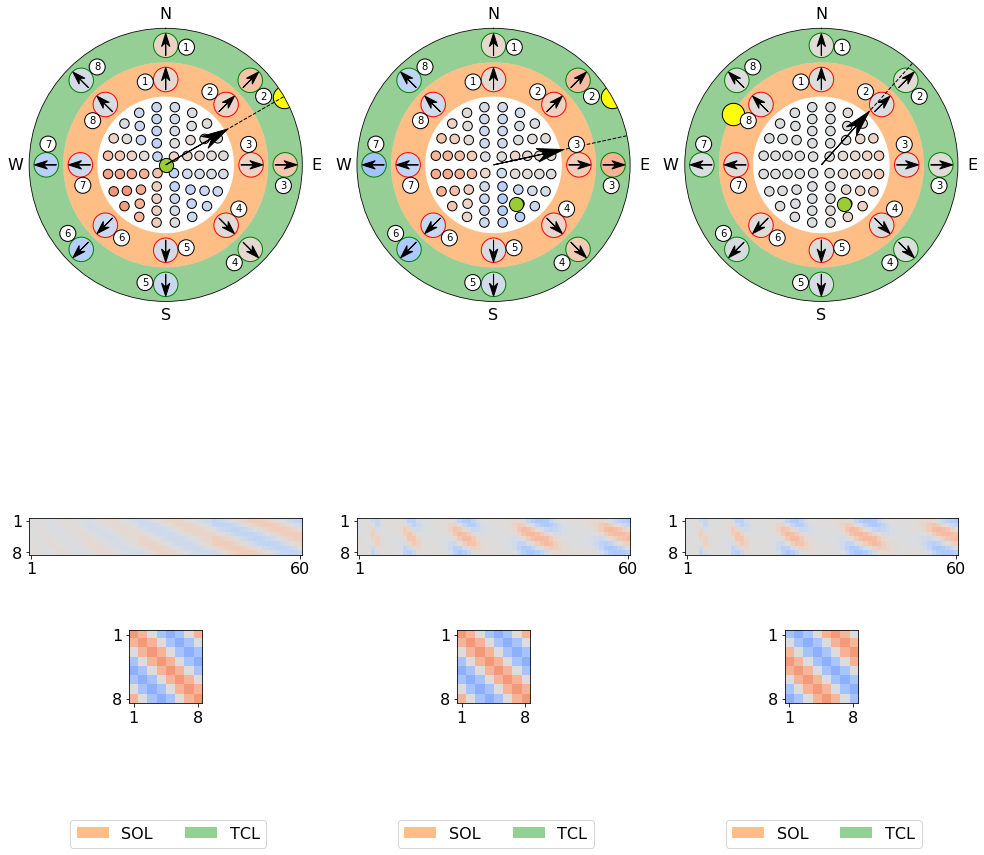

In [10]:
from notebooks.plots import plot_snapshot

plt.figure("Step-by-step processing of the compass model", figsize=(15, 15))
params = evaluate(sun_azi=np.pi/3, sun_ele=np.pi/3, snap=True, tilting=False)
kwargs = {'subplot': 131}
plot_snapshot(*params, **kwargs)
params = evaluate(sun_azi=np.pi/3, sun_ele=np.pi/3, snap=True, tilting=(np.pi/9, 5*np.pi/6))
kwargs = {'subplot': 132}
plot_snapshot(*params, **kwargs)
params = evaluate(sun_azi=-np.pi/3, sun_ele=np.pi/4, snap=True, tilting=(np.pi/9, 5*np.pi/6), ephemeris=True)
kwargs = {'subplot': 133}
plot_snapshot(*params, **kwargs).show()

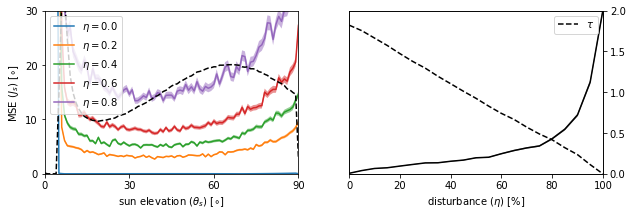

In [4]:
from notebooks.plots import plot_accuracy

plt.figure("Accuracy", figsize=(10, 3))
plot_accuracy().show()

Minimum cost (10.47) for Sigma = 13.00, Shift = 39.00


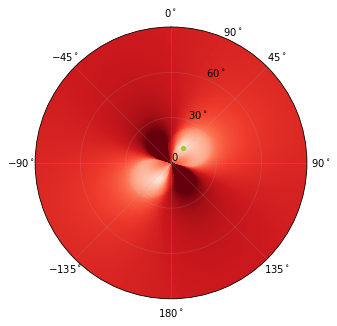

In [3]:
from notebooks.plots import plot_gate_optimisation

plt.figure("Gating parameters optimisation", figsize=(5, 5))
plot_gate_optimisation().show()

Tilt             overall              0 deg              30 deg             60 deg     
---------------------------------------------------------------------------------------
Mean cost    65.78 +/- 0.6289    0.63 +/- 0.0142    35.68 +/- 0.0083    104.01 +/- 0.0140


<Figure size 216x648 with 0 Axes>

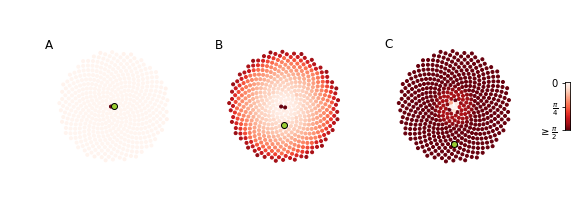

Tilt             overall              0 deg              30 deg             60 deg     
---------------------------------------------------------------------------------------
Mean cost    10.71 +/- 0.1622    0.47 +/- 0.0142    9.53 +/- 0.0040    13.16 +/- 0.0035


<Figure size 216x648 with 0 Axes>

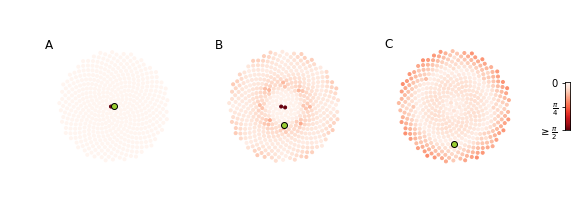

In [4]:
from notebooks.plots import plot_gate_cost

plt.figure("Not dealing with tilt", figsize=(3, 9))
plot_gate_cost(sigma=100.).show()
plt.figure("Dealing with tilt", figsize=(3, 9))
plot_gate_cost().show()